(115, 155, 3)
(115, 155, 3)


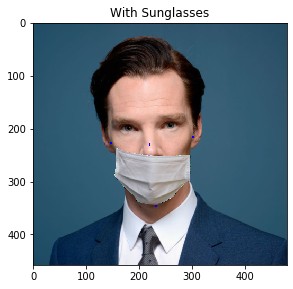

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
import cv2
import numpy as np
import dlib

#cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

imageFilename ="ben.jpg"
img= cv2.imread(imageFilename)
#cv2.imshow('img',img)

#print(faces)


scale_percent = 40 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
faces = detector(img)
for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
    #print(face)
    landmarks = predictor(img, face)

            
#     for n in range(0, 68):
#         x = landmarks.part(n).x
#         y = landmarks.part(n).y
#         cv2.circle(frame, (x, y), 1, (255, 0, 0), -1)


    
    
    l=[]
    for n in range(0, 35):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        #cv2.circle(img, (x, y), 2, (255, 0, 0), -1)
        l.append((x,y))

        
    left=l[1]
    right=l[15]
    up=l[29]
    down=l[8]
    cv2.circle(img, left, 2, (255, 0, 0), -1)
    cv2.circle(img, right, 2, (255, 0, 0), -1)
    cv2.circle(img, up, 2, (255, 0, 0), -1)
    cv2.circle(img, down, 2, (255, 0, 0), -1)
    
    
    
    
faceWithGlassesBitwise = img.copy()
    
    
    # Get the eye region from the face image
eyeROI= faceWithGlassesBitwise[up[1]:down[1],left[0]:right[0]]

    
#plt.subplot(133);plt.imshow(eyeROI[:,:,::-1]);plt.title('Alpha channel');
    
    
    
    
    
    
    
    
    
    
    
    
    
src = cv2.imread('mask_only.jpg')



src_mask = np.zeros(src.shape, src.dtype)
#Specifying the roi of the image for left eye
poly = np.array([ [55,29], [61,144], [56,244], [43,342], [87,391], [142,456], [277,568]
         ,[299,621],[391,650],[522,651],[620,630],[684,590],[721,577],[760,515],
         [805,470],[850,427],[910,391],[916,270],[914,202],[915,142],[916,111],
         [818,117],[662,125],[523,124],[523,124],[414,117],[323,102]
        ,[216,86],[130,68],[78,44]], np.int32)
src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))
masked = cv2.bitwise_or(src_mask, src)



    #Scale the image to your eye size
scale_percent = 100 # percent of original size
width = int(eyeROI.shape[1] * scale_percent / 100)
height = int(eyeROI.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
src = cv2.resize(src, dim, interpolation = cv2.INTER_AREA)
src_mask = cv2.resize(src_mask, dim, interpolation = cv2.INTER_AREA)
masked = cv2.resize(masked, dim, interpolation = cv2.INTER_AREA)

#cv2.imshow('mask', masked)

glassMask=  src_mask

print(glassMask.shape)
print(eyeROI.shape)
masked = cv2.bitwise_and(src_mask, src)

# Use the mask to create the masked eye region
eye = cv2.bitwise_and(eyeROI,cv2.bitwise_not(glassMask))
sunglass = cv2.bitwise_or(eye,masked)






faceWithGlassesBitwise[up[1]:down[1],left[0]:right[0]]=sunglass

# Use the mask to crea
# Use the mask to create the masked sunglass region
#sunglass = cv2.bitwise_and(glassBGR,glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
#eyeRoiFinal = cv2.bitwise_or(eye, sunglass)    
    
# plt.figure(figsize=[20,20])
# plt.subplot(131);plt.imshow(eye[:,:,::-1]);plt.title("Masked Eye Region");
# plt.subplot(131);plt.imshow(masked[:,:,::-1]);plt.title("masked Eye Region");
# plt.subplot(131);plt.imshow(sunglass[:,:,::-1]);plt.title("masked Eye Region");
#plt.subplot(132);plt.imshow(sunglass[:,:,::-1]);plt.title("Masked Sunglass");
#plt.subplot(133);plt.imshow(np.uint8(eyeRoiFinal)[:,:,::-1]);plt.title("Combined Eye Region");    
#cv2.imshow('img',img)
# cv2.waitKey(0) # waits until a key is pressed
# cv2.destroyAllWindows()


plt.subplot(122);plt.imshow(faceWithGlassesBitwise[:,:,::-1]);plt.title("With Sunglasses");

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
import cv2
import numpy as np
import dlib

#cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

imageFilename ="ben.jpg"
img= cv2.imread(imageFilename)
#cv2.imshow('img',img)

faces = detector(img)
for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()
    #cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)
    #print(face)
    landmarks = predictor(img, face)

            
#     for n in range(0, 68):
#         x = landmarks.part(n).x
#         y = landmarks.part(n).y
#         cv2.circle(frame, (x, y), 1, (255, 0, 0), -1)


    
    
    l=[]
    for n in range(0, 35):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        #cv2.circle(img, (x, y), 2, (255, 0, 0), -1)
        l.append((x,y))

        
    left=l[1]
    right=l[15]
    up=l[29]
    down=l[8]
    cv2.circle(img, left, 2, (255, 0, 0), -1)
    cv2.circle(img, right, 2, (255, 0, 0), -1)
    cv2.circle(img, up, 2, (255, 0, 0), -1)
    cv2.circle(img, down, 2, (255, 0, 0), -1)
    

faceWithGlassesBitwise = img.copy()
    

eyeROI= faceWithGlassesBitwise[up[1]:down[1],left[0]:right[0]]

   
src = cv2.imread('mask_only.jpg')

src_mask = np.zeros(src.shape, src.dtype)
#Specifying the roi of the image for left eye
poly = np.array([ [55,29], [61,144], [56,244], [43,342], [87,391], [142,456], [277,568]
         ,[299,621],[391,650],[522,651],[620,630],[684,590],[721,577],[760,515],
         [805,470],[850,427],[910,391],[916,270],[914,202],[915,142],[916,111],
         [818,117],[662,125],[523,124],[523,124],[414,117],[323,102]
        ,[216,86],[130,68],[78,44]], np.int32)
src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))
masked = cv2.bitwise_or(src_mask, src)

    #Scale the image to your eye size
scale_percent = 100 # percent of original size
width = int(eyeROI.shape[1] * scale_percent / 100)
height = int(eyeROI.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
src = cv2.resize(src, dim, interpolation = cv2.INTER_AREA)
src_mask = cv2.resize(src_mask, dim, interpolation = cv2.INTER_AREA)
masked = cv2.resize(masked, dim, interpolation = cv2.INTER_AREA)

glassMask=  src_mask


masked = cv2.bitwise_and(src_mask, src)

# Use the mask to create the masked eye region
eye = cv2.bitwise_and(eyeROI,cv2.bitwise_not(glassMask))
sunglass = cv2.bitwise_or(eye,masked)


faceWithGlassesBitwise[up[1]:down[1],left[0]:right[0]]=sunglass
   
cv2.imshow('img',faceWithGlassesBitwise)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()


#plt.subplot(122);plt.imshow(faceWithGlassesBitwise[:,:,::-1]);plt.title("With Sunglasses");

NameError: name 'l' is not defined

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'
import cv2
import numpy as np
import dlib





def adjust_gamma(image, gamma=1.0):

    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)


cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

while True:
    _, frame = cap.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    #print(faces)
    l=[]
    for face in faces:
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()

        landmarks = predictor(gray, face)
        

        for n in range(0, 35):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            #cv2.circle(img, (x, y), 2, (255, 0, 0), -1)
            l.append((x,y))
            
            
            

        left=l[1]
        right=l[15]
        up=l[28]
        down=l[8]

        
        

        faceWithGlassesBitwise = frame.copy()


        eyeROI= faceWithGlassesBitwise[up[1]-15:down[1]+15,left[0]-15:right[0]+15]


        src = cv2.imread('mask_only.jpg')

        src_mask = np.zeros(src.shape, src.dtype)
        #Specifying the roi of the image for left eye
        poly = np.array([ [55,29], [64,141], [56,244], [43,311], [87,391], [143,463],[195,533],[232,574], [325,633]
                 ,[391,650],[466,655],[522,655],[620,630],[684,596],[727,555],[760,515],
                 [805,470],[850,427],[910,391],[916,270],[914,202],[915,142],[916,111],
                 [818,117],[662,125],[523,124],[523,124],[414,117],[323,102]
                ,[216,86],[130,68],[78,44]], np.int32)
        src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))
        masked = cv2.bitwise_or(src_mask, src)

            #Scale the image to your eye size
        scale_percent = 100 # percent of original size
        width = int(eyeROI.shape[1] * scale_percent / 100)
        height = int(eyeROI.shape[0] * scale_percent / 100)
        dim = (width, height)
        # resize image
        src = cv2.resize(src, dim, interpolation = cv2.INTER_AREA)
        src_mask = cv2.resize(src_mask, dim, interpolation = cv2.INTER_AREA)
        masked = cv2.resize(masked, dim, interpolation = cv2.INTER_AREA)

        glassMask=  src_mask


        masked = cv2.bitwise_and(src_mask, src)

        # Use the mask to create the masked eye region
        eye = cv2.bitwise_and(eyeROI,cv2.bitwise_not(glassMask))
        sunglass = cv2.bitwise_or(eye,masked)


        faceWithGlassesBitwise[up[1]-15:down[1]+15,left[0]-15:right[0]+15]=sunglass








        
        
        gamma = 3  # change the value here to get different result
        adjusted_output = adjust_gamma(faceWithGlassesBitwise, gamma=gamma)



        #frame = cv2.fillPoly(frame, [leftEyeHull], (255, 255, 255))
    adjusted_output = cv2.bilateralFilter(adjusted_output, 3, 175, 175)
    
    cv2.imshow("adjusted_output", adjusted_output)
    
   # cv2.imshow("final", final)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [6]:
l[8][1]+20

486

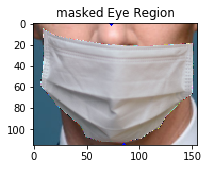

In [13]:
plt.subplot(131);plt.imshow(sunglass[:,:,::-1]);plt.title("masked Eye Region");

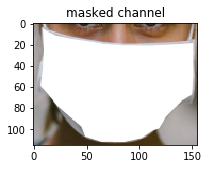

In [32]:
plt.subplot(133);plt.imshow(masked[:,:,::-1]);plt.title('masked channel');


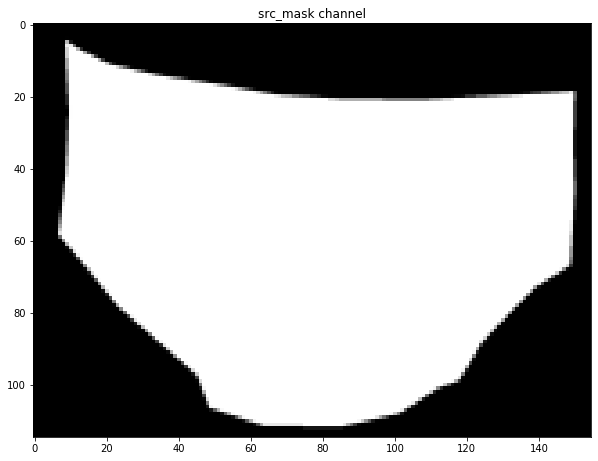

In [28]:
plt.subplot(133);plt.imshow(src_mask);plt.title('src_mask channel');

    

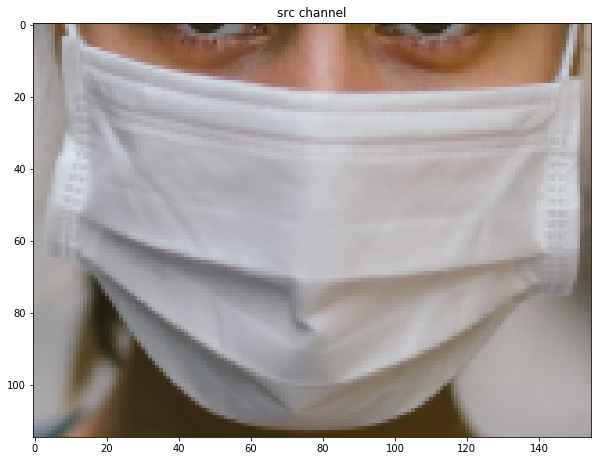

In [29]:
plt.subplot(133);plt.imshow(src[:,:,::-1]);plt.title('src channel');
#cv2.imshow('src_mask', src_mask)    

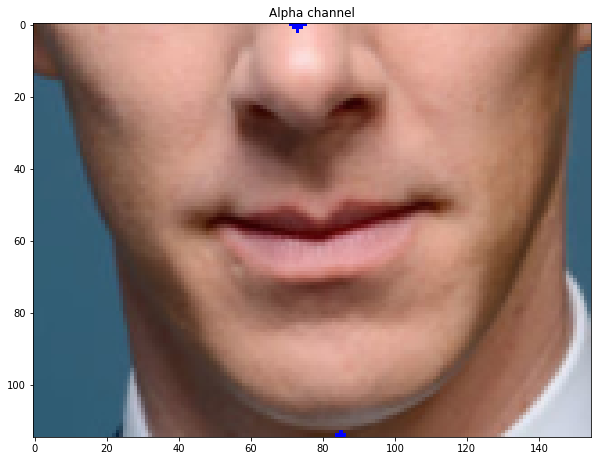

In [30]:
 plt.subplot(133);plt.imshow(eyeROI[:,:,::-1]);plt.title('Alpha channel');    